In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import torch
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "/home/ec2-user/s3"
sz = 224
arch = resnext101_64
bs = 58

In [5]:
label_json = f'{PATH}/train.json'

# Initial exploration

In [6]:
!ls {PATH}

sample_submission.csv  test.json  train.json  validation.json
test		       train	  validation


In [7]:
train_data = json.load(open(label_json))

In [8]:
label_df = pd.DataFrame(train_data['annotations'])

In [9]:
label_df.head()

,imageId,labelId
0,1,"[95, 66, 137, 70, 20]"
1,2,"[36, 66, 44, 214, 105, 133]"
2,3,"[170, 66, 97, 153, 105, 138]"
3,4,"[18, 66, 44, 153, 164]"
4,5,"[189, 66, 176, 137, 153, 74, 181, 171, 138]"


In [10]:
pivot_df = pd.DataFrame(label_df['labelId'].tolist(), index=label_df['imageId']).stack()
pivot_df = pivot_df.reset_index(level='imageId')
pivot_df.columns = ['imageId', 'labelId']

In [11]:
pivot_df.head()

,imageId,labelId
0,1,95
1,1,66
2,1,137
3,1,70
4,1,20


In [12]:
pt = pivot_df.pivot_table(index='labelId', aggfunc=len, values='imageId')
pt.columns = ['count']
pt.sort_values('count', ascending=False)

,count
labelId,
66,743250
105,330864
153,261844
17,251869
171,243038
106,193283
222,151339
214,150814
53,142948


# Exploration cont'd

In [20]:
# save labels as csv if not already
label_df.to_csv(f'{PATH}/train_labels.csv', index=False)

# TODO: join training and validation (?)

In [23]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}/train_labels.csv', test_name='test', 
                                    tfms=tfms, bs=bs, suffix='.jpg')

In [32]:
fn = PATH + "/" + data.trn_ds.fnames[0]; fn

'/home/ec2-user/s3/train/2.jpg'

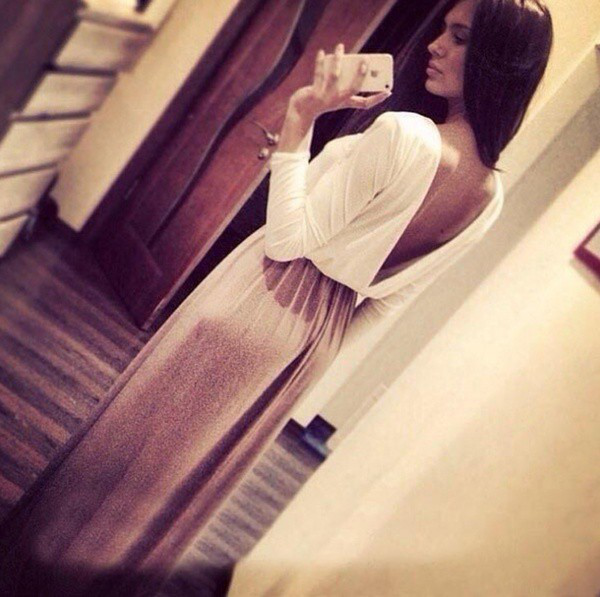

In [37]:
img = PIL.Image.open(fn); img

In [34]:
img.size

(600, 597)

In [36]:
size_d = {k: PIL.Image.open(PATH + "/" + k).size for k in data.trn_ds.fnames}

FileNotFoundError: [Errno 2] No such file or directory: '/home/ec2-user/s3/train/10001.jpg'